# Question 1: Working with Malaria Dataset

**Q1(a): Loading the Malaria dataset and visualizing its samples.**

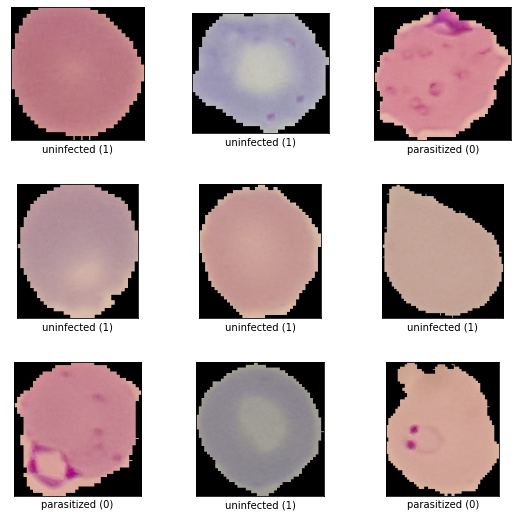

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Question 1a: Loading and showing samples of data
ds, ds_info = tfds.load("malaria", split="train", shuffle_files=True, as_supervised=True, with_info=True)
samples = tfds.show_examples(ds, ds_info)

We can clearly see that there is a visual difference between different samples in the dataset. More specifically, there are two kinds of samples; one with spots and one without spots. The samples with darker, round spots show that they are infected. Thus, we can conclude that there are two classes in this dataset, infected and uninfected.

**Q1(b): Binary Classification Model**

Binary classification model classifies a given dataset into two different categories. This type of classification model is used when the given dataset has only two classes. For this task, binary classification is used because we are provided with two classes in the dataset, infected and uninfected. Compared to other multiclass classification models, a binary classification model would work much better on this problem as it is built to classify datasets with two classes more efficiently.


**Q1(c): Preprocessing the Data**

Two approaches were utilized to preprocess the Malaria dataset.
1. **Scaling of Images:** Images are scaled so that they are normalized between the range of 0 to 1. 

2. **Resizing of Images:** The images in the dataset were of different sizes, hence they are rescaled, and now all images in the data are of size 100x100.



In [ ]:
#Loading as a batch in pandas dataframe

ds, ds_info = tfds.load("malaria", split="train", shuffle_files=True, as_supervised=True, with_info=True)

In [ ]:
#Taking 10000 samples from the dataset and creating numpy arrays for the data

df = tfds.as_dataframe(ds.take(15000), ds_info)
images, labels = df['image'], df['label']

In [ ]:
#resizing images
image_data = np.array([cv2.resize(img, dsize=(100,100), interpolation=cv2.INTER_CUBIC) for img in images])

#convert dtype
image_data = image_data.astype('float32')

#scaling RGB values
image_data /= 255

**Q1(d) and Q1(e): Building and Training a Logistic Regression Model**

In [ ]:
#Splitting the data into train and test to perform logistic regression

x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.33, random_state=42)

In [ ]:
#Flattening train and test data(will work only if images are in RGB channel)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [ ]:
#Creating and training Logistic Regression Model

clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicting using the model

predictions = clf.predict(x_test)

In [ ]:
#Displaying accuracy score

score = clf.score(x_test, y_test)
print("Score of Logistic Regression Model is: ", score)

Score of Logistic Regression Model is:  0.6525252525252525


# Question 2: Loading the CIFAR-10 Dataset

**Brief Description About CIFAR-10 Dataset**

Cifar10 Dataset is about images of different objects. There are total 10 different classes in this dataset, which are, 
1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck

There are total 60000 images in the original dataset. In the loaded dataset below, there are 50000 images for training and 10000 images for testing. Each image in the dataset is a colored image (has 3 color channels RGB), and is of dimension 32x32.

**Preprocessing in Image Data**

While dealing with image data in general, different preprocessing steps can be applied which are rescaling, resizing, sharpening or blurring of images using filters. These operations standarize the data, remove unwanted information and enhance the image for further processing.

170500096/170498071 [==============================] - 2s 0us/step


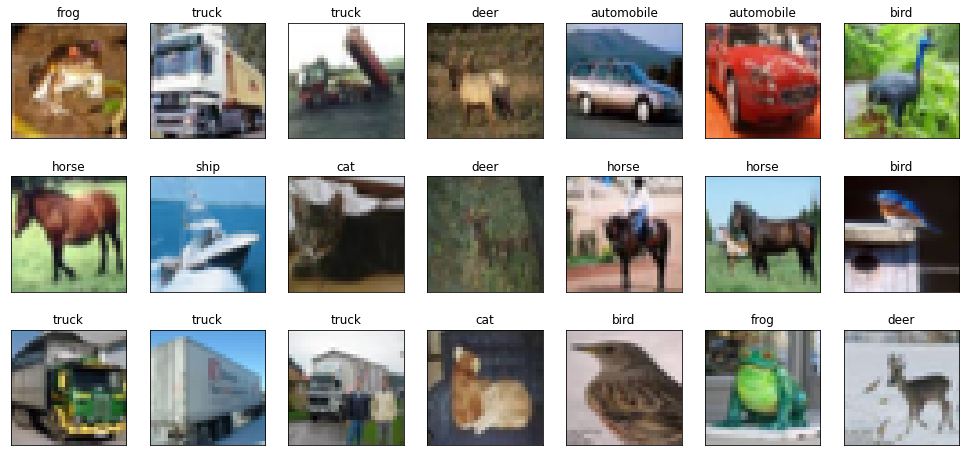

In [ ]:
#Loading CIFAR-10 Dataset

from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Labels taken from the CIFAR-10 dataset webpage
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

#Displaying some samples of the data
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
  for j in range(7):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(x_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

# Question 3: Building a Custom Filter Function

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def filt(input, filter, padding, normalization):
  width, height= input.shape[0], input.shape[1]
  x_filter, y_filter = filter.shape
  pad_width = math.ceil((x_filter - 1)/2)
  pad_height = math.ceil((y_filter - 1)/2)
  
  output_image = np.zeros(input.shape)
  padded_image = input
  
  if len(input.shape) != 3: #Greyscale image
    if padding:
      padded_image = np.zeros((width + (2 * pad_width), height + (2 * pad_height)))
      padded_image = np.pad(input, (pad_width, pad_height), mode='constant')
      
    elif not padding:
      sub_img = np.subtract(padded_image.shape[0:2], filter.shape)  
      output_image = np.zeros((sub_img[0] + 1, sub_img[1] + 1), dtype=int)
    
      #output_image = np.zeros((width - 2*pad_width, height - 2*pad_height))
    if normalization:
      padded_image = padded_image.astype("float32")
      output_image = output_image.astype("float32")
      padded_image = (padded_image -  np.amin(padded_image))/ np.amax(padded_image)+ np.amin(padded_image)
      
    output_width = output_image.shape[0] - x_filter + 1
    output_height = output_image.shape[1] - y_filter + 1

    for i in range(output_width):
      for j in range(output_height):
          output_image[i, j] = np.sum(filter*padded_image[i:i+x_filter, j:j+y_filter])

  else: #RGB image
    if padding:
      padded_image = np.zeros((input.shape[0] + (2 * pad_width), input.shape[1] + (2 * pad_width), 3))
      padded_image[:, :, 0] = np.pad(input[:, :, 0], pad_width, mode='constant')
      padded_image[:, :, 1] = np.pad(input[:, :, 1], pad_width, mode='constant')
      padded_image[:, :, 2] = np.pad(input[:, :, 2], pad_width, mode='constant')
      output_image = np.zeros(padded_image.shape)

    elif not padding:
      sub_img = np.subtract(padded_image.shape[0:2], filter.shape)  
      output_image = np.zeros((sub_img[0] + 1, sub_img[1] + 1), dtype=int)
    
    if normalization:
      padded_image = padded_image.astype("float32")
      output_image = output_image.astype("float32")

      padded_image[:, :, 0]= (padded_image[:, :, 0] - np.amin(padded_image[:, :, 0])) / (np.amax(padded_image[:, :, 0])- np.amin(padded_image[:, :, 0]))
      padded_image[:, :, 1]= (padded_image[:, :, 1] - np.amin(padded_image[:, :, 1])) / (np.amax(padded_image[:, :, 1])- np.amin(padded_image[:, :, 1]))
      padded_image[:, :, 2]= (padded_image[:, :, 2] - np.amin(padded_image[:, :, 2])) / (np.amax(padded_image[:, :, 2])- np.amin(padded_image[:, :, 2]))

    output_width = output_image.shape[0] - x_filter + 1
    output_height = output_image.shape[1] - y_filter + 1

    for i in range(3): #3 channels
      for j in range(output_width):
        for k in range(output_height):
          output_image[j,k,i] = np.sum(filter * padded_image[:, :, i][j:j+x_filter, k:k+y_filter])
                                                      
  return output_image


Text(0.5, 1.0, 'Grayscale Image')

<Figure size 432x288 with 0 Axes>

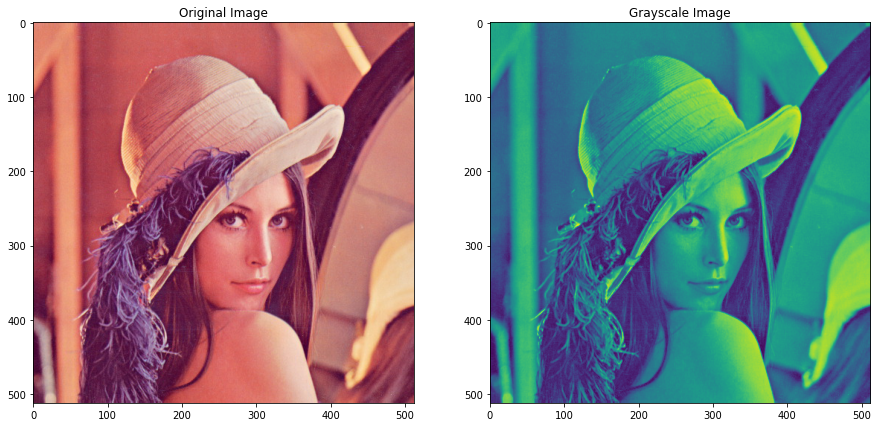

In [ ]:
#Loading a sample image from the web for testing the filter function

from skimage import io

image_filename = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
image = io.imread(image_filename)

#Get a grayscaled version of the image
grayscale_image = io.imread(image_filename, as_gray=True)

#Display both the images
plt.figure()
fig, ax = plt.subplots(1, 2, figsize= (15,8)) 

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(grayscale_image)
ax[1].set_title("Grayscale Image")

In [ ]:
#Defining different filters
sharpen_filter = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
emboss_filter = np.array([[-1, -1, -1, -1,  0], [-1, -1, -1,  0,  1], [-1, -1,  0,  1,  1], [-1,  0,  1,  1,  1], [0,  1,  1,  1,  1]])
edges_filter = np.array([[0,  0, -1,  0,  0], [0,  0, -1,  0,  0], [0,  0,  2,  0,  0], [0,  0,  0,  0,  0], [0,  0,  0,  0,  0]])

#Applying the filters on colored image
sharpen_image = filt(image, sharpen_filter, True, False)
emboss_image = filt(image, emboss_filter, True, False)
edges_image = filt(image, edges_filter, True, False)

#Applying the filters on grayscale image
grayscale_sharpen_image = filt(grayscale_image, sharpen_filter, True, False)
grayscale_emboss_image = filt(grayscale_image, emboss_filter, True, False)
grayscale_edges_image = filt(grayscale_image, edges_filter, True, False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Find Edges Filter Image')

<Figure size 432x288 with 0 Axes>

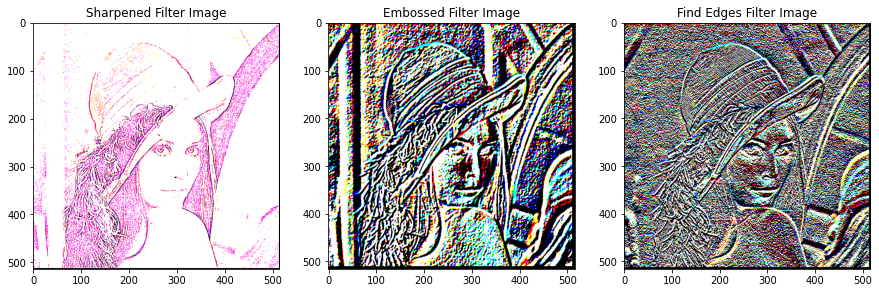

In [ ]:
#Show the results of filtering on colored images

plt.figure()

fig, ax = plt.subplots(1, 3, figsize= (15,8)) 

ax[0].imshow(sharpen_image)
ax[0].set_title("Sharpened Filter Image")

ax[1].imshow(emboss_image)
ax[1].set_title("Embossed Filter Image")

ax[2].imshow(edges_image)
ax[2].set_title("Find Edges Filter Image")

Text(0.5, 1.0, 'Find Edges Filter Image')

<Figure size 432x288 with 0 Axes>

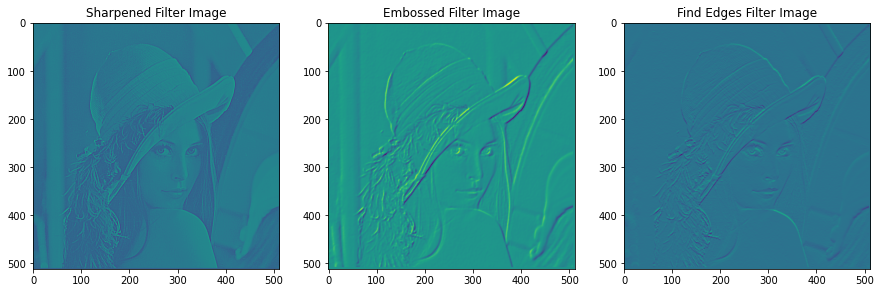

In [ ]:
#Show the results of filtering on grayscale images

plt.figure()

fig, ax = plt.subplots(1, 3, figsize= (15,8)) 

ax[0].imshow(grayscale_sharpen_image)
ax[0].set_title("Sharpened Filter Image")

ax[1].imshow(grayscale_emboss_image)
ax[1].set_title("Embossed Filter Image")

ax[2].imshow(grayscale_edges_image)
ax[2].set_title("Find Edges Filter Image")

# Question 4: Extracting HOG Features and Training a Linear SVM

In [ ]:
from keras.datasets import cifar10
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
from sklearn import svm
from sklearn.metrics import accuracy_score

#Loading the dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Extracting HOG features for training dataset
train_features = np.empty(shape=(x_train.shape[0], 144))
for i in range(len(x_train)):
  image = x_train[i]
  train_features[i] = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), multichannel=True)

#Extracting HOG features for test dataset
test_features = np.empty(shape=(x_test.shape[0], 144))
for i in range(len(x_test)):
  image = x_test[i]
  test_features[i] = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), multichannel=True)

In [ ]:
#Flattening the labels
y_train = np.ravel(y_train)

In [ ]:
#Training Linear SVM 
clf = svm.SVC()
clf.fit(train_features, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predicting labels on test data
y_pred = clf.predict(test_features)

In [ ]:
#Displaying accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5518


# Question 5: Training a Neural Network for CIFAR-10 Dataset

**Q5(a): Feed Forward Neural Network**

In [13]:
from keras.datasets import cifar10
from keras.utils import np_utils
import cv2
import numpy as np

#Loading CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
#Preprocessing the data

#Converting the type to float
x_train, x_test = x_train.astype("float32"), x_test.astype("float32")

#Scaling the data between 0 to 1
x_train /= 255
x_test /= 255

#Reshaping training and test data (remove 3 if not testing on RGB)
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

#Convert labels to one hot encoding
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)

In [15]:
#Creating a feed forward neural network

from keras.models import Model
from keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import Adam

input_layer = Input(shape=(32*32*3,))
hidden_layer1 = Dense(1024, activation="relu")(input_layer)
regularizer = Dropout(0.5)(hidden_layer1)
hidden_layer2 = Dense(512,activation="relu")(regularizer)
regularizer2 = Dropout(0.5)(hidden_layer2)
hidden_layer3 = Dense(256,activation="relu")(regularizer2)

output_layer = Dense(10, activation="softmax")(hidden_layer3)

model = Model(inputs=input_layer, outputs=output_layer)

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

In [17]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 2s 5ms/step - loss: 2.2188 - accuracy: 0.1822 - val_loss: 1.8934 - val_accuracy: 0.3180
Epoch 2/100
391/391 [==============================] - 2s 4ms/step - loss: 1.9269 - accuracy: 0.3007 - val_loss: 1.7796 - val_accuracy: 0.3601
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.8431 - accuracy: 0.3315 - val_loss: 1.7356 - val_accuracy: 0.3767
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7933 - accuracy: 0.3522 - val_loss: 1.6690 - val_accuracy: 0.4141
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7619 - accuracy: 0.3652 - val_loss: 1.6381 - val_accuracy: 0.4152
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7300 - accuracy: 0.3816 - val_loss: 1.6139 - val_accuracy: 0.4278
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 1.7007 - accuracy: 0.3898 - val_loss: 1.5884 - val_accuracy: 0.4365

In [20]:
#Report training and validation accuracies

print('Training accuracy:',max(history.history['accuracy']))
print('Validation accuracy:',max(history.history['val_accuracy']))

Training accuracy: 0.5898200273513794
Validation accuracy: 0.5601000189781189


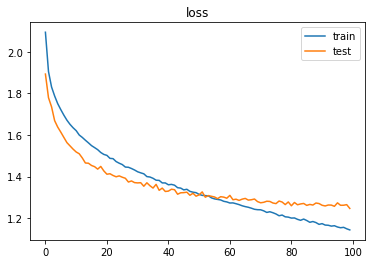

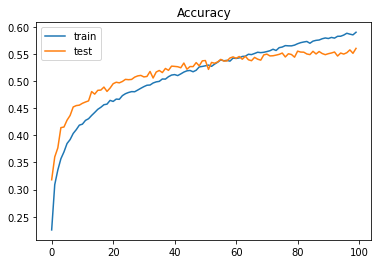

In [21]:
#Plotting training and validation loss, training and validation accuracy

import matplotlib.pyplot as plt

plt.figure()
plt.title("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.show()

plt.figure()
plt.title("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"])
plt.show()

**Q5(b): Convolutional Neural Network**

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
import tensorflow as tf

#Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Preprocessing the data

#converting the type
x_train, x_test = x_train.astype("float32"), x_test.astype("float32")

#Scaling the data between 0 to 1
x_train /= 255
x_test /= 255

y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)

In [ ]:
#Question 5b:
#Creating a convolutional neural network

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras import regularizers
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(256, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=60, validation_data=(x_test, y_test))

Epoch 1/60
391/391 [==============================] - 19s 48ms/step - loss: 2.1747 - accuracy: 0.1590 - val_loss: 1.8904 - val_accuracy: 0.3136
Epoch 2/60
391/391 [==============================] - 19s 48ms/step - loss: 1.7829 - accuracy: 0.3321 - val_loss: 1.5557 - val_accuracy: 0.4142
Epoch 3/60
391/391 [==============================] - 20s 50ms/step - loss: 1.5908 - accuracy: 0.4048 - val_loss: 1.4106 - val_accuracy: 0.4721
Epoch 4/60
391/391 [==============================] - 20s 51ms/step - loss: 1.4457 - accuracy: 0.4625 - val_loss: 1.3040 - val_accuracy: 0.5178
Epoch 5/60
391/391 [==============================] - 20s 50ms/step - loss: 1.3544 - accuracy: 0.5065 - val_loss: 1.2349 - val_accuracy: 0.5467
Epoch 6/60
391/391 [==============================] - 19s 50ms/step - loss: 1.2880 - accuracy: 0.5303 - val_loss: 1.1634 - val_accuracy: 0.5718
Epoch 7/60
391/391 [==============================] - 20s 50ms/step - loss: 1.2246 - accuracy: 0.5551 - val_loss: 1.1512 - val_accuracy:

In [ ]:
#Report training and validation accuracies

print('Training accuracy:',max(history.history['accuracy']))
print('Validation accuracy:',max(history.history['val_accuracy']))

Training accuracy: 0.860260009765625
Validation accuracy: 0.8151999711990356


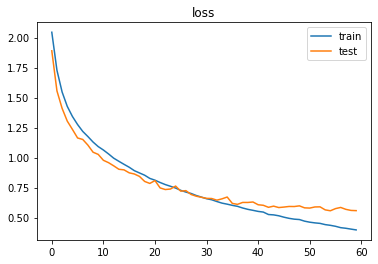

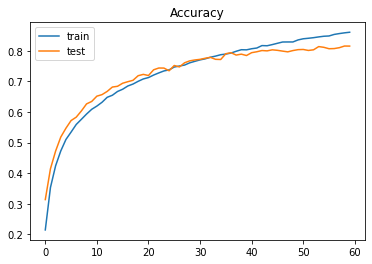

In [ ]:
#Plotting training and validation loss, training and validation accuracy

import matplotlib.pyplot as plt

plt.figure()
plt.title("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.show()

plt.figure()
plt.title("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"])
plt.show()

**Q5(c): Using pre-trained VGG16 network as feature extractor with feed forward neural network**

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
import tensorflow as tf

#Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Preprocessing the data

#converting the type
x_train, x_test = x_train.astype("float32"), x_test.astype("float32")

#Scaling the data between 0 to 1
x_train /= 255
x_test /= 255

#Converting the labels to one hot encoding
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)

In [ ]:
#Resizing image size in accordance with VGG16 network

x_train = tf.image.resize(x_train, (64,64))
x_test = tf.image.resize(x_test, (64,64))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, UpSampling2D
from tensorflow.keras import regularizers
from keras.optimizers import Adam
from keras.applications import vgg16

#Using pretrained VGG16 network for feature extraction 
vgg16_model = vgg16. VGG16(include_top=False, weights="imagenet", input_shape=(64,64,3))
for i in vgg16_model.layers: 
  i.trainable = False

model= Sequential()
#1024 256 128 works
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(1024, input_shape = x_train.shape, activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(256, activation=('relu')))
model.add(Dropout(0.2))
model.add(Dense(128, activation=('relu')))
model.add(Dropout(0.4))

model.add(Dense(10, activation=('softmax')))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr = 0.00001), metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 28s 30ms/step - loss: 2.3026 - accuracy: 0.1466 - val_loss: 1.8688 - val_accuracy: 0.4153
Epoch 2/50
782/782 [==============================] - 23s 30ms/step - loss: 1.9294 - accuracy: 0.3248 - val_loss: 1.5626 - val_accuracy: 0.5044
Epoch 3/50
782/782 [==============================] - 22s 29ms/step - loss: 1.6876 - accuracy: 0.4146 - val_loss: 1.3925 - val_accuracy: 0.5455
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.5424 - accuracy: 0.4700 - val_loss: 1.2975 - val_accuracy: 0.5721
Epoch 5/50
782/782 [==============================] - 23s 29ms/step - loss: 1.4538 - accuracy: 0.5021 - val_loss: 1.2258 - val_accuracy: 0.5911
Epoch 6/50
782/782 [==============================] - 23s 29ms/step - loss: 1.3875 - accuracy: 0.5259 - val_loss: 1.1824 - val_accuracy: 0.6011
Epoch 7/50
782/782 [==============================] - 23s 29ms/step - loss: 1.3206 - accuracy: 0.5456 - val_loss: 1.1405 - val_accuracy:

In [ ]:
#Report training and validation accuracies

print('Training accuracy:',max(history.history['accuracy']))
print('Validation accuracy:',max(history.history['val_accuracy']))

Training accuracy: 0.7504199743270874
Validation accuracy: 0.7168999910354614


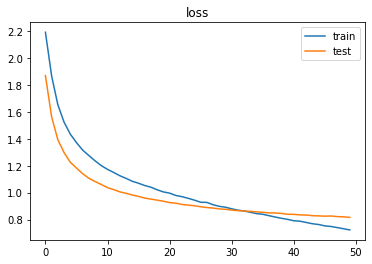

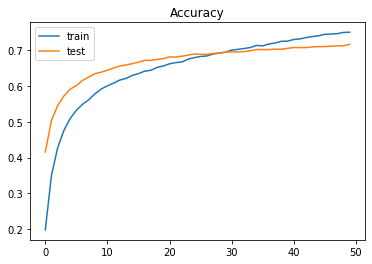

In [ ]:
#Plotting training and validation loss, training and validation accuracy

import matplotlib.pyplot as plt

plt.figure()
plt.title("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.show()

plt.figure()
plt.title("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["train", "test"])
plt.show()